In [1]:
import tensorflow as tf
a = tf.add(1,2, name="addition_1")
b = tf.multiply(a,3, name ="multipying_1")
c = tf.add(4,5, name="addition_2")
d = tf.multiply(c,6, name ="multipying_2")
e = tf.multiply(4,5, name ="multipying_3")
f = tf.div(c,6, name ="division_1")

g = tf.add(b,d, name="addition_3")
h = tf.multiply(g,f, name ="multipying_4")

with tf.Session() as sess:
  writer = tf.summary.FileWriter("./logs", sess.graph)
  print(sess.run(h))
  writer.close()

Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
63


In [1]:
import tensorflow as tf

with tf.name_scope("My_Graph"):
  with tf.name_scope("Scope_1"):
    a = tf.add(1,2, name="addition_1")
    b = tf.multiply(a,3, name ="multipying_1")
  with tf.name_scope("Scope_2"):
    c = tf.add(4,5, name="addition_2")
    d = tf.multiply(c,6, name ="multipying_2")
with tf.name_scope("Scope_3"):
  e = tf.multiply(4,5)
  f = tf.div(c,6, name ="division")

g = tf.add(b,d)
h = tf.multiply(g,f)

with tf.Session() as sess:
  writer = tf.summary.FileWriter("./logs", sess.graph)
  print(sess.run(h))
  writer.close()

Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
63


In [1]:
import tensorflow as tf
tf.reset_default_graph()

s_scalar = tf.get_variable(name='s_scalar', shape=[], initializer=tf.truncated_normal_initializer(mean=0, stddev=1))
first_summary = tf.summary.scalar(name='First_summary',tensor=s_scalar)

init = tf.global_variables_initializer()

with tf.Session() as sess:
  writer = tf.summary.FileWriter('./logs', sess.graph)
  for i in range(100):
    sess.run(init)
    summary = sess.run(first_summary)
    writer.add_summary(summary,i)

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
import tensorflow as tf
tf.reset_default_graph()

s_scalar = tf.get_variable(name='s_scalar', shape=[], initializer=tf.truncated_normal_initializer(mean=0, stddev=1))
y_matrix = tf.get_variable(name='y_matrix', shape=[40, 50], initializer=tf.truncated_normal_initializer(mean=0, stddev=1))
first_summary = tf.summary.scalar(name='First_summary', tensor = s_scalar)
histogram_summary = tf.summary.histogram(name='histogram_summary', values=y_matrix)
init = tf.global_variables_initializer()

with tf.Session() as sess:
  writer = tf.summary.FileWriter('./logs', sess.graph)
  for i in range(100):
    sess.run(init)
    summary1, summary2 = sess.run([first_summary, histogram_summary])
    writer.add_summary(summary1,i)
    writer.add_summary(summary2,i)

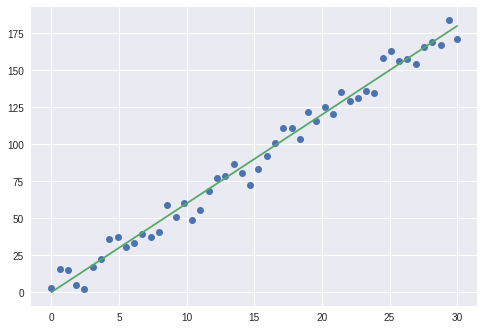

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

learning_parameter = 0.01
epoch = 300
nsamples = 50
x_train = np.linspace(0,30,nsamples)
y_train = 6*x_train+7*np.random.randn(nsamples)

plt.plot(x_train, y_train, 'o')
plt.plot(x_train, 6*x_train)
plt.show()

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

learning_parameter = 0.01
epochs = 300
nsamples = 50

x_train = np.linspace(0,30,nsamples)
y_train = 6*x_train+7*np.random.randn(nsamples)

Y = tf.placeholder(tf.float32)
X = tf.placeholder(tf.float32)

W = tf.Variable(np.random.randn(),name='weights')
B = tf.Variable(np.random.randn(),name='bias')

with tf.name_scope("Model") as scope:
  pred = W*X+B
  
weight_histogram = tf.summary.histogram("Weights", W)
bias_histogram = tf.summary.histogram("Bias",B)

with tf.name_scope("Cost_function") as scope:
  cost_iteration =tf.reduce_sum((pred-Y)**2)/(2*nsamples)

cost_summary = tf.summary.scalar("Cost",cost_iteration)

with tf.name_scope("Training") as scope:
  optimizer = tf.train.GradientDescentOptimizer(learning_parameter).minimize(cost_iteration)

init = tf.global_variables_initializer()

merged_summary = tf.summary.merge_all()



Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


Epochs 0.000000 Cost 0.366044 Weight 5.628654 Bias 1.444636
Epochs 40.000000 Cost 0.007125 Weight 5.850484 Bias 1.684015
Epochs 80.000000 Cost 0.006609 Weight 5.842683 Bias 1.886869
Epochs 120.000000 Cost 0.006157 Weight 5.835618 Bias 2.070560
Epochs 160.000000 Cost 0.005762 Weight 5.829221 Bias 2.236898
Epochs 200.000000 Cost 0.005416 Weight 5.823428 Bias 2.387521
Epochs 240.000000 Cost 0.005111 Weight 5.818182 Bias 2.523918
Epochs 280.000000 Cost 0.004844 Weight 5.813432 Bias 2.647423


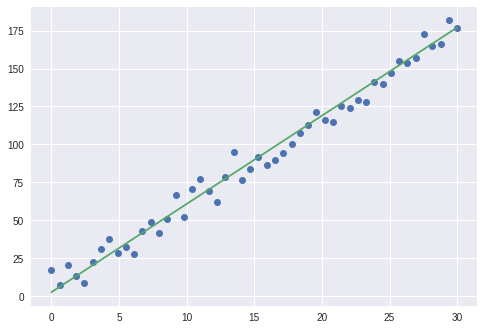

In [2]:
with tf.Session() as sess:
  sess.run(init)
  writer = tf.summary.FileWriter('./log',sess.graph)
  
  for epoch in range(epochs):
    for x,y in zip(x_train,y_train):
      sess.run(optimizer, feed_dict = {X : x, Y : y})
      
      summary_epochs = sess.run(merged_summary, feed_dict = {X:x, Y:y})
      writer.add_summary(summary_epochs, epoch)
      
    if not epoch%40:
      W1 = sess.run(W)
      B1 = sess.run(B)
      cost_iter = sess.run(cost_iteration, feed_dict={X:x, Y:y})
      print('Epochs %f Cost %f Weight %f Bias %f' %(epoch, cost_iter, W1, B1))
      
  Weight = sess.run(W)
  Bias = sess.run(B)
  
  plt.plot(x_train, y_train, 'o')
  plt.plot(x_train,Weight*x_train+Bias)
  plt.show()